In [3]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 980.1 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 597.9 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 439.8 kB/s eta 0:00:0000:0100:02


In [11]:
 !pip install opencv-python matplotlib pandas numpy

In [5]:
!pip install numpy

In [6]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 1.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 976.0 kB/s eta 0:00:00a 0:00:01


In [7]:
!pip install pip

In [9]:
!apt-get update && apt-get install ffmpeg libsm6 libxext6  -y

Reading package lists... Done
E: List directory /var/lib/apt/lists/partial is missing. - Acquire (13: Permission denied)


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv2.imread("image.png")

In [6]:
type(img)

numpy.ndarray

In [4]:
img.shape

(765, 981, 3)

In [8]:
alto = img.shape[0]
ancho = img.shape[1]

In [11]:
img_salida = np.zeros_like(img)

In [22]:
for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i,j]
        blue = pixel[2]
        green = pixel[1]
        red = pixel[0]

        img_salida[i,j] = [0, 0 , red]

In [23]:
# guardamos tensor en disco para generar la imagen
cv2.imwrite("monocromo.jpg",img_salida)
monocromo = cv2.imread("monocromo.jpg")

# volvemos a leer la imagen para deplegar
monocromo = cv2.cvtColor(monocromo, cv2.COLOR_BGR2RGB)

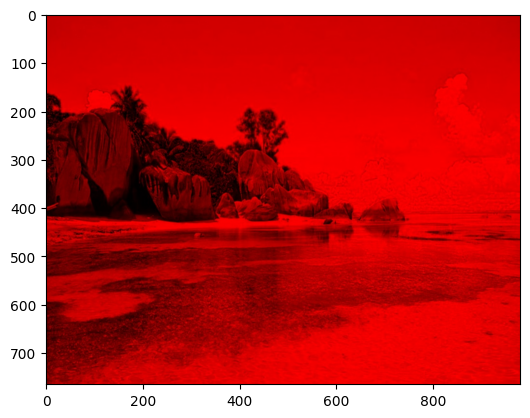

In [24]:
plt.imshow(monocromo)
plt.show()

## Escala de grises

In [25]:
alto = img.shape[0]
ancho = img.shape[1]



In [26]:
gris_ponderado = np.zeros((alto,ancho,1))

In [27]:
for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i,j]
        blue = pixel[2]
        green = pixel[1]
        red = pixel[0]

        gris_ponderado[i,j] = int(0.299*red+ 0.587*green + 0.11*blue)

In [28]:
cv2.imwrite("gris_ponderado.jpg",gris_ponderado)
gris = cv2.imread("gris_ponderado.jpg", cv2.COLOR_BGR2RGB)

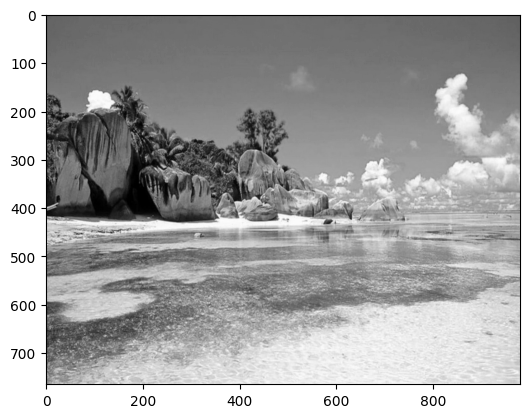

In [31]:
plt.imshow(gris, cmap="gray")
plt.show()

# Labotario #1

### Problema #1

Procesando azul color


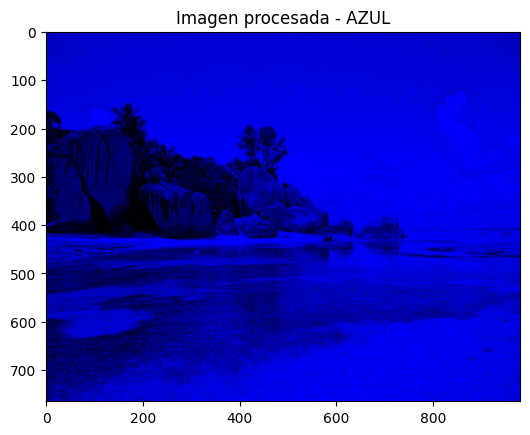

In [101]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from enum import Enum

class Color(Enum):
    AZUL       = 1
    VERDE      = 2
    ROJO       = 3
    ROJO_VERDE = 10
    VERDE_AZUL = 20
    AZUL_ROJO  = 30

matriz = {}
matriz[Color.AZUL.name] = np.array([1,0,0])
matriz[Color.VERDE.name] = np.array([0,1,0])
matriz[Color.ROJO.name] = np.array([0,0,1])
matriz[Color.ROJO_VERDE.name] = np.array([0,1,1])
matriz[Color.VERDE_AZUL.name] = np.array([1,1,0])
matriz[Color.AZUL_ROJO.name] = np.array([1,0,1])

def problema1(Imagen, IntColor):
    try:
        color_seleccionado = Color(IntColor)
    except ValueError:
        raise ValueError(f"{IntColor} no es un color válido")
    
    print(f"Procesando {color_seleccionado.name.lower()} color")
    
    try:
        img = cv2.imread(Imagen)
        if img is None:
            raise Exception("Error al cargar la imagen")
    except Exception as e:
        print(f"Error al procesar la imagen: {str(e)}")
        return
    
    alto, ancho = img.shape[:2]
    img_salida = np.zeros_like(img)
    
    for i in range(alto):
        for j in range(ancho):
            pixel = img[i,j]
            img_salida[i,j] = pixel * matriz[color_seleccionado.name]
    
    img_salida = cv2.cvtColor(img_salida, cv2.COLOR_BGR2RGB)
    plt.imshow(img_salida)
    plt.title(f"Imagen procesada - {color_seleccionado.name}")
    plt.show()

problema1("image.png", 1)

## Problema #2

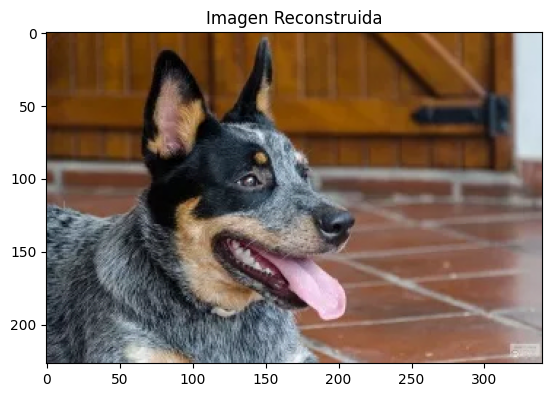

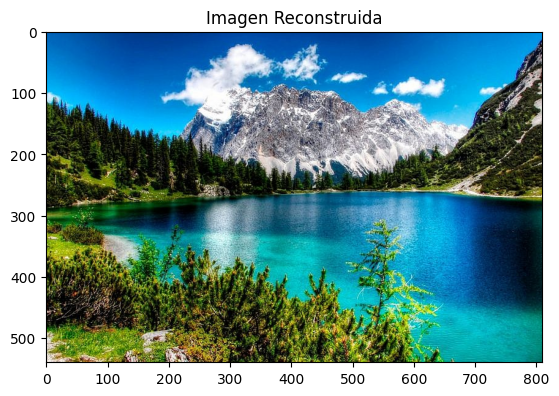

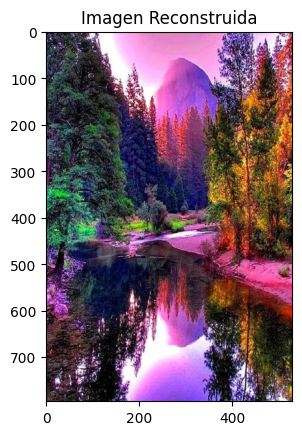

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reconstruir_imagen_color(ruta_azul, ruta_verde, ruta_rojo):
    # Leer las imágenes en escala de grises
    canal_azul = cv2.imread(ruta_azul, cv2.IMREAD_GRAYSCALE)
    canal_verde = cv2.imread(ruta_verde, cv2.IMREAD_GRAYSCALE)
    canal_rojo = cv2.imread(ruta_rojo, cv2.IMREAD_GRAYSCALE)
    
    # Verificar que todas las imágenes se cargaron correctamente
    if canal_azul is None or canal_verde is None or canal_rojo is None:
        raise Exception("Error al cargar una o más imágenes")
    
    # Verificar que todas las imágenes tienen el mismo tamaño
    if canal_azul.shape != canal_verde.shape or canal_azul.shape != canal_rojo.shape:
        raise Exception("Las imágenes deben tener el mismo tamaño")

    
    # Combinar los canales para crear la imagen a color
    altura, ancho = canal_azul.shape[:2]
    img_salida = np.zeros((altura, ancho, 3), dtype=np.uint8)
    
    # Combinar los canales para crear la imagen a color usando un ciclo for
    for i in range(altura):
        for j in range(ancho):
            img_salida[i, j, 0] = canal_azul[i, j]
            img_salida[i, j, 1] = canal_verde[i, j]
            img_salida[i, j, 2] = canal_rojo[i, j]
                
    # Convertir de BGR a RGB para mostrar correctamente con matplotlib
    img_salida = cv2.cvtColor(img_salida, cv2.COLOR_BGR2RGB)
    
    # Mostrar la imagen reconstruida
    plt.imshow(img_salida), plt.title('Imagen Reconstruida')
    plt.show()


reconstruir_imagen_color(
    "Lab1/perro/perro_salida_gray_azul.jpg",
    "Lab1/perro/perro_salida_gray_verde.jpg",
    "Lab1/perro/perro_salida_gray_rojo.jpg")


reconstruir_imagen_color(
    "Lab1/imagen1/imagen1_salida_gray_azul.jpg",
    "Lab1/imagen1/imagen1_salida_gray_verde.jpg",
    "Lab1/imagen1/imagen1_salida_gray_rojo.jpg")


reconstruir_imagen_color(
    "Lab1/imagen2/imagen2_salida_gray_azul.jpg",
    "Lab1/imagen2/imagen2_salida_gray_verde.jpg",
    "Lab1/imagen2/imagen2_salida_gray_rojo.jpg")

## Ejercicio 3

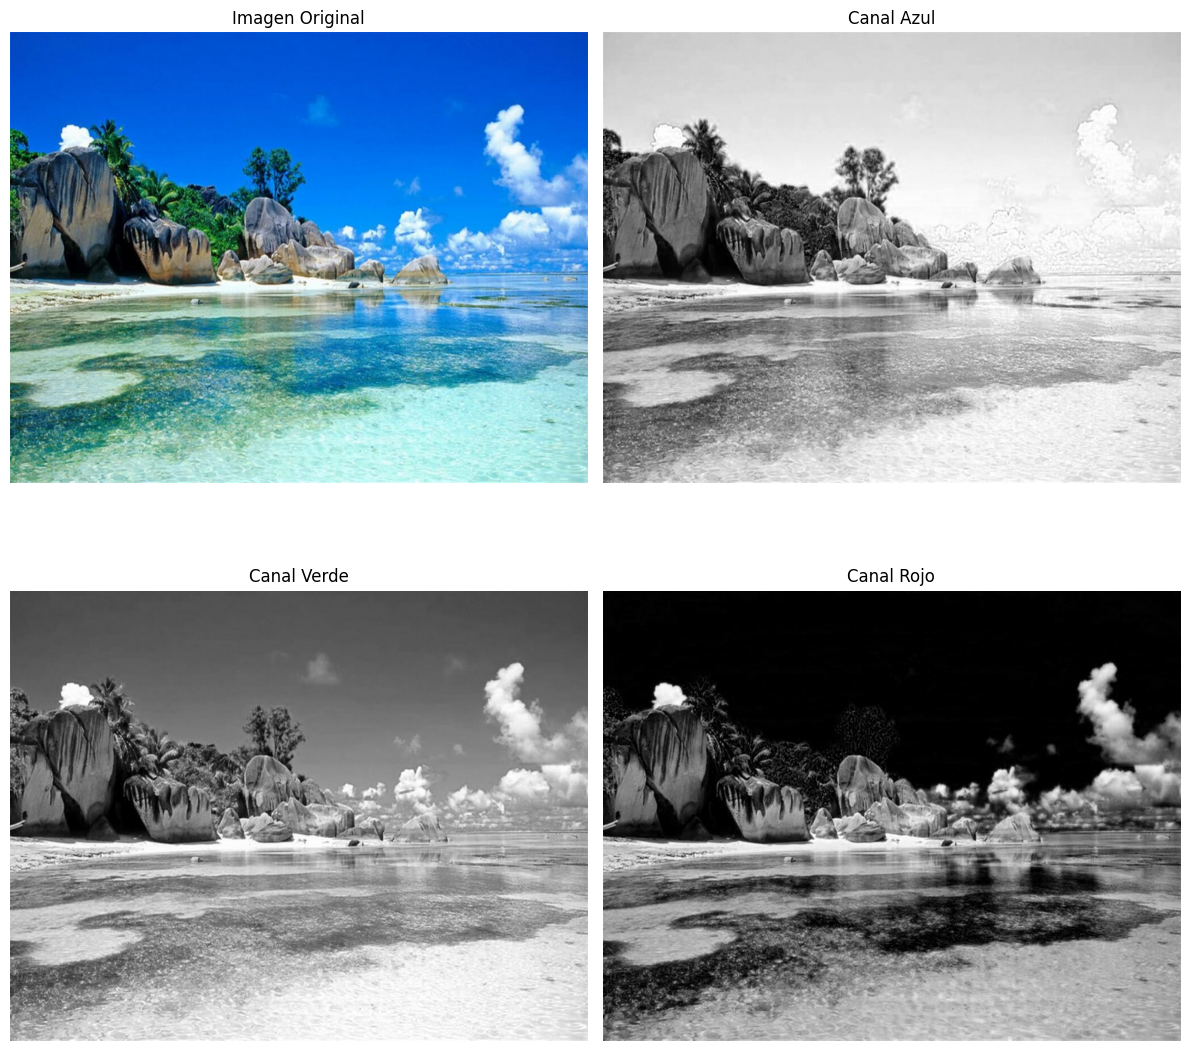

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_to_3d_grayscale(image_path):
    # Leer la imagen
    img = cv2.imread(image_path)
    
    # Separar los canales
    b, g, r = cv2.split(img)
    
    # Convertir cada canal a escala de grises
    gray_b = cv2.merge([b, b, b])
    gray_g = cv2.merge([g, g, g])
    gray_r = cv2.merge([r, r, r])
    
    return gray_b, gray_g, gray_r

def show_3d_grayscale(image_path):
    # Obtener las imágenes en escala de grises
    blue_gray, green_gray, red_gray = color_to_3d_grayscale(image_path)
    
    # Crear una figura con subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    
    # Mostrar la imagen original
    original = cv2.imread(image_path)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para matplotlib
    axs[0, 0].imshow(original)
    axs[0, 0].set_title('Imagen Original')
    axs[0, 0].axis('off')
    
    # Mostrar el canal azul
    axs[0, 1].imshow(blue_gray)
    axs[0, 1].set_title('Canal Azul')
    axs[0, 1].axis('off')
    
    # Mostrar el canal verde
    axs[1, 0].imshow(green_gray)
    axs[1, 0].set_title('Canal Verde')
    axs[1, 0].axis('off')
    
    # Mostrar el canal rojo
    axs[1, 1].imshow(red_gray)
    axs[1, 1].set_title('Canal Rojo')
    axs[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Guardar las imágenes resultantes
    cv2.imwrite('3d/blue_channel.jpg', blue_gray)
    cv2.imwrite('3d/green_channel.jpg', green_gray)
    cv2.imwrite('3d/red_channel.jpg', red_gray)

# Uso de la función
image_path = 'image.png'
show_3d_grayscale(image_path)

## Ejercicio 4

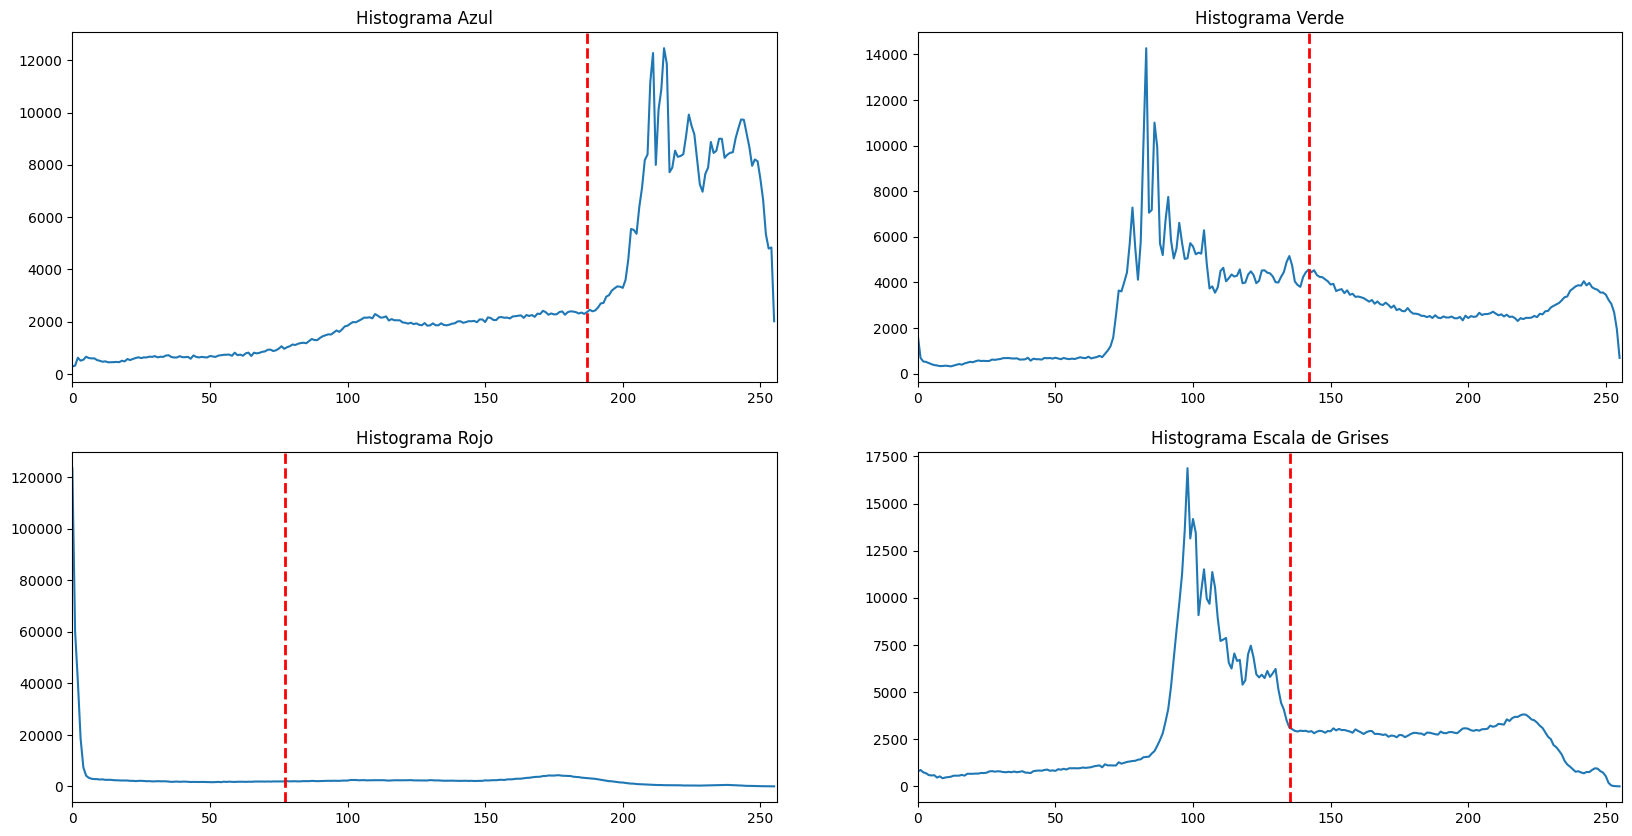

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_histograms(image_path):
    # Leer la imagen
    img = cv2.imread(image_path)
    
    # Separar los canales
    b, g, r = cv2.split(img)
    
    # Calcular escala de grises (promedio aritmético)
    gray = np.mean(img, axis=2).astype(np.uint8)
    
    # Calcular histogramas
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
    
    # Calcular medias
    mean_b = np.mean(b)
    mean_g = np.mean(g)
    mean_r = np.mean(r)
    mean_gray = np.mean(gray)
    
    # Mostrar histogramas
    plt.figure(figsize=(20, 10))
    
    plt.subplot(221), plt.plot(hist_b), plt.axvline(mean_b, color='r', linestyle='dashed', linewidth=2)
    plt.title('Histograma Azul'), plt.xlim([0, 256])
    
    plt.subplot(222), plt.plot(hist_g), plt.axvline(mean_g, color='r', linestyle='dashed', linewidth=2)
    plt.title('Histograma Verde'), plt.xlim([0, 256])
    
    plt.subplot(223), plt.plot(hist_r), plt.axvline(mean_r, color='r', linestyle='dashed', linewidth=2)
    plt.title('Histograma Rojo'), plt.xlim([0, 256])
    
    plt.subplot(224), plt.plot(hist_gray), plt.axvline(mean_gray, color='r', linestyle='dashed', linewidth=2)
    plt.title('Histograma Escala de Grises'), plt.xlim([0, 256])
    
    plt.show()

# Uso de la función
show_histograms('image.png')

## Ejercicio 5

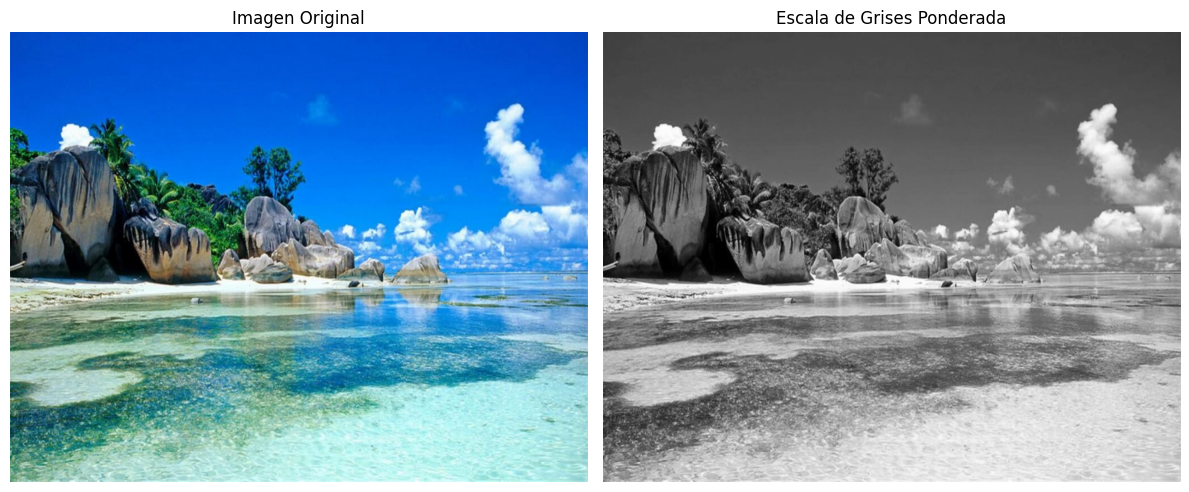

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def weighted_grayscale(image_path):
    # Leer la imagen
    img = cv2.imread(image_path)
    
    # Separar los canales
    b, g, r = cv2.split(img)
    
    # Aplicar pesos (estos son solo un ejemplo, puedes ajustarlos)
    weighted_gray = 0.299 * r + 0.587 * g + 0.114 * b
    
    return weighted_gray.astype(np.uint8)

def show_weighted_grayscale(image_path):
    # Obtener la imagen original
    original = cv2.imread(image_path)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para matplotlib
    
    # Obtener la imagen en escala de grises ponderada
    gray_image = weighted_grayscale(image_path)
    
    # Crear una figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Mostrar la imagen original
    ax1.imshow(original)
    ax1.set_title('Imagen Original')
    ax1.axis('off')
    
    # Mostrar la imagen en escala de grises ponderada
    ax2.imshow(gray_image, cmap='gray')
    ax2.set_title('Escala de Grises Ponderada')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Guardar la imagen en escala de grises ponderada
    cv2.imwrite('weighted_grayscale.jpg', gray_image)

# Uso de la función
image_path = 'image.png'
show_weighted_grayscale(image_path)

## Ejercicio 6

# Espacio de color HSV

El espacio de color HSV (Hue, Saturation, Value) es una representación alternativa del espacio de color RGB.

- **Hue (Matiz)**: Representa el tipo de color, medido en grados de 0 a 360. Por ejemplo:
  - 0 es rojo
  - 120 es verde
  - 240 es azul

- **Saturation (Saturación)**: Representa la "pureza" del color. Va de 0 a 100%.
  - 0% es un tono de gris
  - 100% es el color puro

- **Value (Valor)**: Representa el brillo del color. También va de 0 a 100%.
  - 0% es negro
  - 100% es el color más brillante

El mapeo de RGB a HSV se realiza mediante fórmulas matemáticas que convierten las coordenadas RGB en coordenadas HSV.

El espacio HSV es útil en procesamiento de imágenes porque separa la información del color (matiz) de su intensidad y saturación, lo que puede ser beneficioso para ciertas aplicaciones como la segmentación de color.